# Navy Seal Burpees

### Progress on Track

#### Funções:

Importação de Bibliotecas e Carregamento de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def carregar_totais_csv(caminho):
    """
    Carrega os totais mensais de um arquivo CSV.
    """
    if os.path.exists(caminho):
        df_totais = pd.read_csv(caminho)
        totais = df_totais.set_index('Mes')['Total'].to_dict()
        return totais
    else:
        return None

# Definir o diretório do projeto com base no diretório atual
diretorio_projeto = os.getcwd()

# Caminho para a pasta de backup
caminho_backup_pasta = os.path.join(diretorio_projeto, 'backup')

# Inicializar o dicionário para armazenar os totais mensais
totais_mensais = {}

# Listar e carregar apenas os arquivos que começam com 'totais_mensais_' na pasta de backup
for arquivo in os.listdir(caminho_backup_pasta):
    if arquivo.startswith('totais_mensais_') and arquivo.endswith('_backup.csv'):
        caminho_backup = os.path.join(caminho_backup_pasta, arquivo)
        totais_ano = carregar_totais_csv(caminho_backup)
        if totais_ano:
            totais_mensais.update(totais_ano)


Função para Plotar Gráfico Anual

In [2]:
def plotar_grafico_anual(ano):
    totais_ano = {mes: total for mes, total in totais_mensais.items() if mes.startswith(str(ano))}
    if not totais_ano:
        print(f"Nenhum dado mensal disponível para {ano}.")
        return
    
    # Extrair meses e totais
    meses = [mes[5:] for mes in totais_ano.keys()]  # Extrai apenas o mês (MM) da chave (YYYY-MM)
    totais = list(totais_ano.values())
    
    plt.figure(figsize=(12, 6))
    barras = plt.bar(meses, totais, color='#1f77b4', edgecolor='black')
    total_ano = sum(totais)
    plt.title(f'Navy Seal Burpees ({ano}) - Total: {total_ano}', fontsize=16, weight='bold')
    plt.xlabel('Mês', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'{barra.get_height()}', ha='center', va='bottom', fontsize=12)
    
    plt.show()


Função para Plotar Totais Anuais

In [3]:
def plotar_totais_anuais():
    totais_por_ano = {}
    for chave, valor in totais_mensais.items():
        ano = chave[:4]
        totais_por_ano[ano] = totais_por_ano.get(ano, 0) + valor
    
    anos, totais = list(totais_por_ano.keys()), list(totais_por_ano.values())
    plt.figure(figsize=(12, 6))
    barras = plt.bar(anos, totais, color='#ff7f0e', edgecolor='black')
    plt.title('Navy Seal Burpees - Total p/ Ano', fontsize=16, weight='bold')
    plt.xlabel('Ano', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'{barra.get_height()}', ha='center', va='bottom', fontsize=12)
    
    plt.show()


Função para Plotar Gráfico Total

In [4]:
def plotar_grafico_total(anos=None):
    if anos == ["todos"]:
        anos = sorted({mes[:4] for mes in totais_mensais.keys()}, reverse=True)
    
    meses = [f'{mes:02d}' for mes in range(1, 13)]
    plt.figure(figsize=(12, 6))
    
    for ano in anos:
        totais_ano = [totais_mensais.get(f'{ano}-{mes}', 0) for mes in meses]
        total_ano = sum(totais_ano)
        plt.plot(meses, totais_ano, marker='o', label=f'{ano} ({total_ano})', linewidth=2, markersize=6)
        
        for mes, total in zip(meses, totais_ano):
            plt.text(mes, total, f'{total}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Navy Seal Burpees - Comparação p/ Ano', fontsize=16, weight='bold')
    plt.xlabel('Mês', fontsize=14)
    plt.legend(title='', fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()

    caminho_imagem = os.path.join('backup', 'grafico_total.png')
    plt.savefig(caminho_imagem)
    
    plt.show()


Função para Calcular a Frequência Total

In [5]:
def frequencia_por_quantidade(caminho_backup):
    frequencia_total = {}
    
    # Processar todos os arquivos de backup
    for arquivo in os.listdir(caminho_backup):
        if arquivo.startswith('frequencia_') and arquivo.endswith('_backup.csv'):
            df = pd.read_csv(os.path.join(caminho_backup, arquivo))
            
            # Somar as frequências por quantidade
            for _, linha in df.iterrows():
                quantidade = int(linha['Quantidade'])
                frequencia = int(linha['Frequência'])
                frequencia_total[quantidade] = frequencia_total.get(quantidade, 0) + frequencia
    
    # Ordenar o dicionário pela quantidade
    return dict(sorted(frequencia_total.items()))

def exibir_frequencia(frequencia_total):
    # Total geral, incluindo a quantidade zero
    total_geral = sum(frequencia_total.values())

    # Total excluindo a quantidade zero
    total_sem_zero = sum(freq for quant, freq in frequencia_total.items() if quant != 0)

    print(f"{'Quantidade':<12} {'Frequência':<12} {'Porcentagem':<12}")
    print("=" * 36)
    
    # Exibir a quantidade 0 com uma linha separadora antes
    if 0 in frequencia_total:
        frequencia = frequencia_total[0]
        porcentagem = (frequencia / total_geral) * 100
        print(f"{'0':<12} {frequencia:<12} {porcentagem:>9.2f}%")
        print("-" * 36)  # Linha separadora

    # Exibir as outras quantidades
    for quantidade, frequencia in frequencia_total.items():
        if quantidade != 0:
            porcentagem = (frequencia / total_sem_zero) * 100
            print(f"{quantidade:<12} {frequencia:<12} {porcentagem:>9.2f}%")
    
    print("=" * 36)

# Definir o caminho da pasta de backup
caminho_backup = os.path.join(os.getcwd(), 'backup')

# Calcular as frequências totais por quantidade
frequencia_total = frequencia_por_quantidade(caminho_backup)


## Annual Comparison

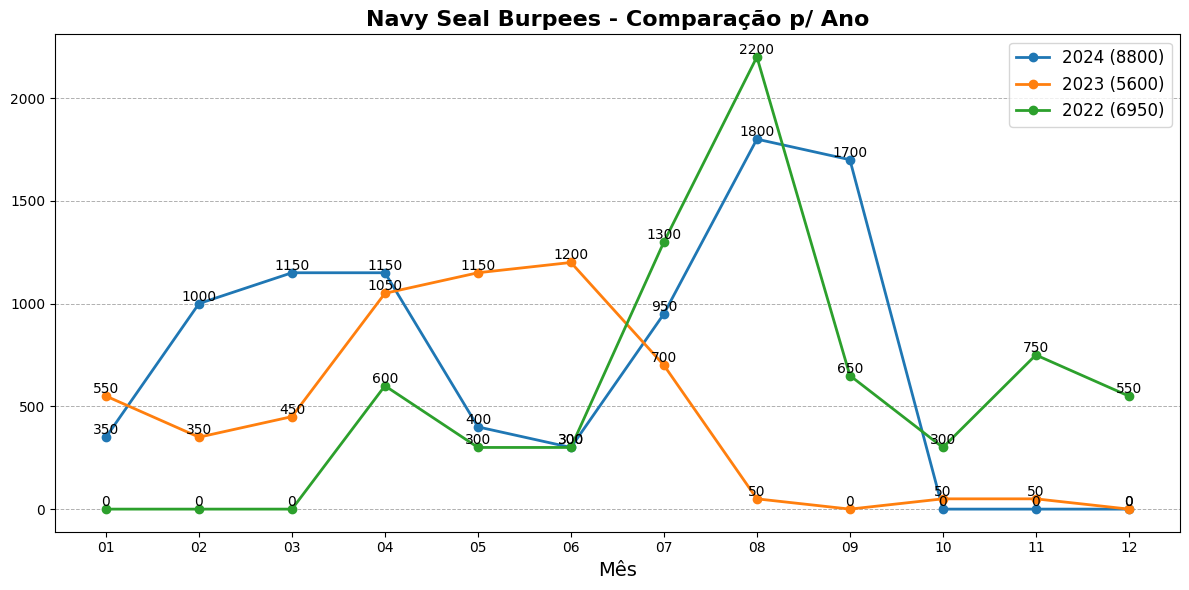

In [6]:
plotar_grafico_total(anos=['todos'])
# plotar_grafico_total(anos=['2023', '2024'])

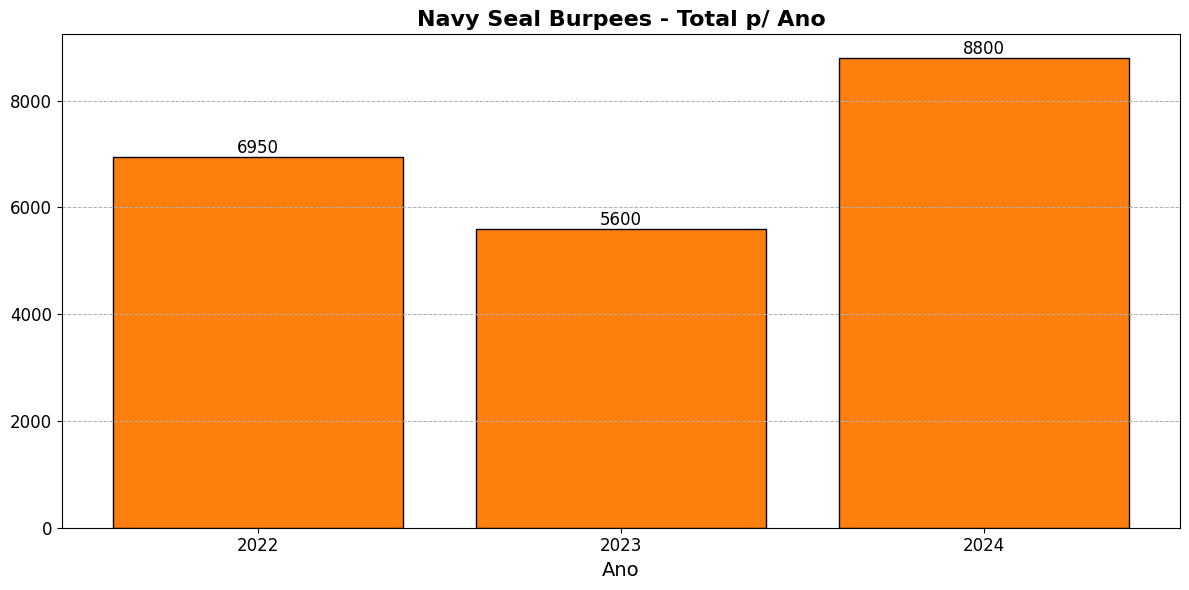

In [7]:
plotar_totais_anuais()

In [8]:
exibir_frequencia(frequencia_total)

Quantidade   Frequência   Porcentagem 
0            944              86.13%
------------------------------------
50           5                 3.29%
100          93               61.18%
150          13                8.55%
200          26               17.11%
250          6                 3.95%
300          4                 2.63%
350          1                 0.66%
400          4                 2.63%


Melhor Tempo:

100 - 15m 05s  
200 - 42m 40s  
250 - 56m 53s  
300 - 1h 02m 07s  
400 - 1h 27m 05s  
500 -  

## Per Annum

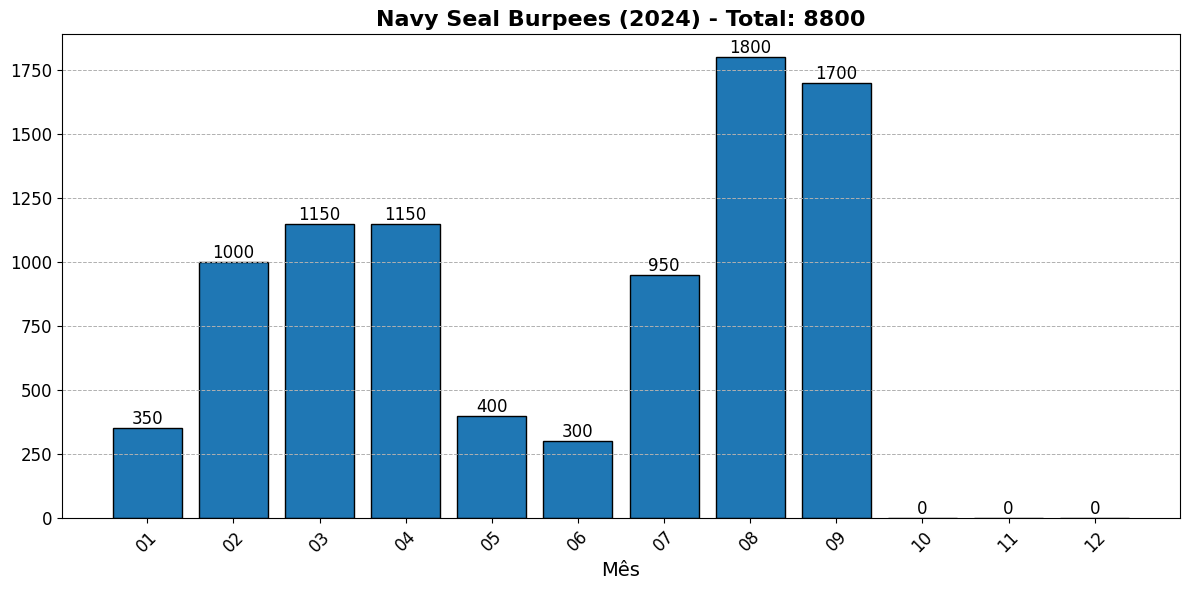

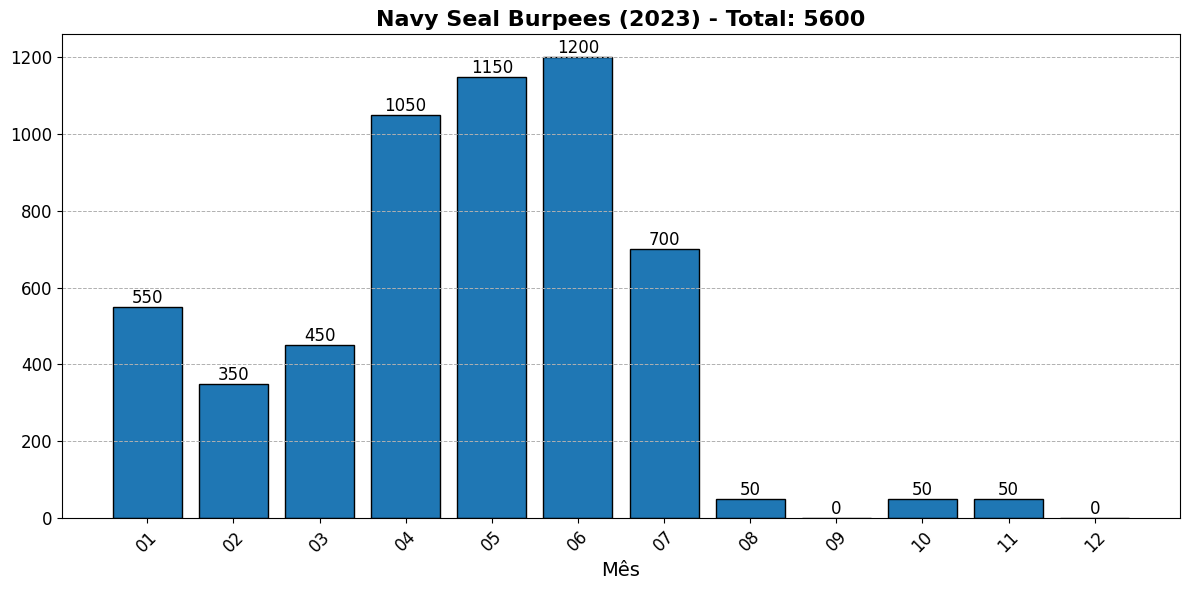

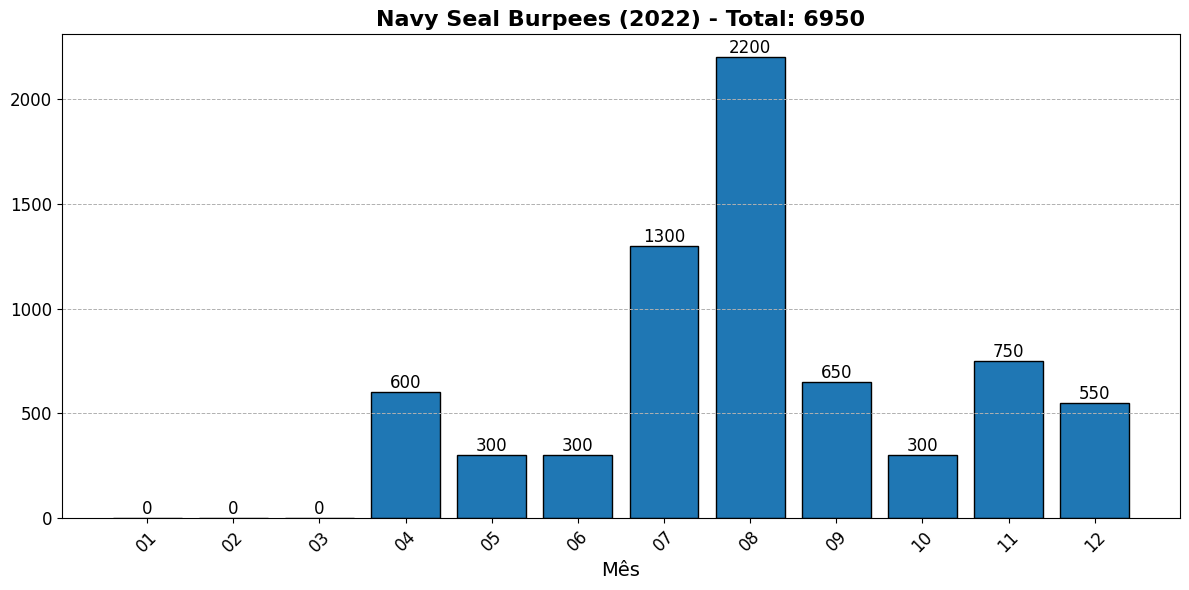

In [9]:
for ano in [2024, 2023, 2022]:
    plotar_grafico_anual(ano)